In [1]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import reviews, Sort
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
apps = {
    "Amazon": "com.amazon.mShop.android.shopping",
    "Shein": "com.zzkko",
    "AliExpress": "com.alibaba.aliexpresshd",
    "Noon": "com.noon.buyerapp",
    "Trendyol": "trendyol.com"
}


In [4]:
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

In [5]:
all_reviews = []

for app_name, app_id in apps.items():
    print(f"Fetching reviews for {app_name}...")

    result, _ = reviews(
        app_id,
        lang="en",
        country="us",
        sort=Sort.NEWEST,
        count=3000
    )

    for r in result:
        all_reviews.append({
            "app_name": app_name,
            "review_text": r["content"],
            "rating": r["score"],
            "sentiment_label": label_sentiment(r["score"])
        })

Fetching reviews for Amazon...
Fetching reviews for Shein...
Fetching reviews for AliExpress...
Fetching reviews for Noon...
Fetching reviews for Trendyol...


In [6]:
df = pd.DataFrame(all_reviews)
df.head()


,app_name,review_text,rating,sentiment_label
0,Amazon,best place to buy,5,Positive
1,Amazon,"you can get anything at Amazon,and the price i...",5,Positive
2,Amazon,I haven't really bought or ordered anything ye...,5,Positive
3,Amazon,"there not as good as they used to be, they do ...",1,Negative
4,Amazon,It's great that you can find almost anything o...,3,Neutral


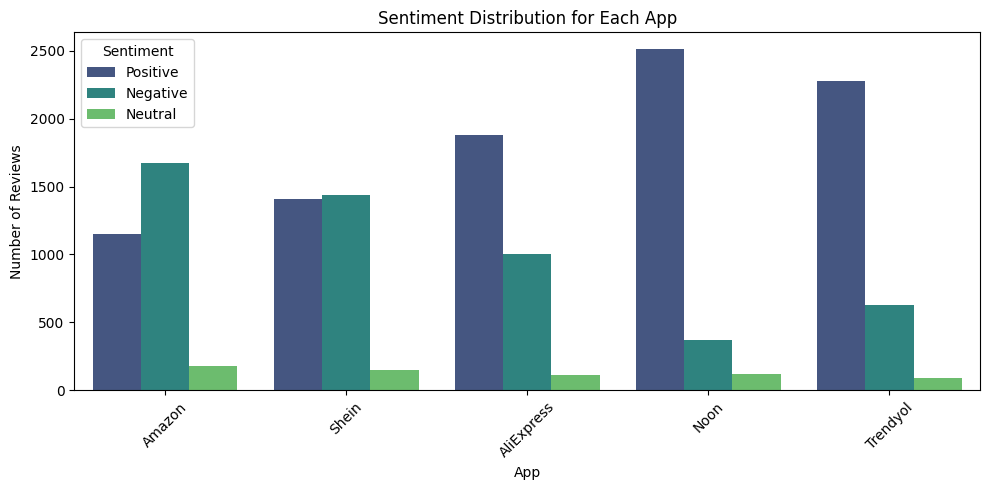

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df_before = df.copy()
plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_before,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [8]:
print ("Before: \n", df_before["sentiment_label"]. value_counts ())

Before: 
 sentiment_label
Positive    9221
Negative    5120
Neutral      659
Name: count, dtype: int64


In [9]:
df = df[df["review_text"].astype(str).str.contains(r"[A-Za-z]", na=False)].copy()
df["review_text"] = df["review_text"].astype(str)
df = df[df["review_text"].str.strip().ne("")].copy()

print("After language/empty filtering:", len(df))

After language/empty filtering: 14442


In [10]:
import re



def clean_text(text):

    text = re.sub(r"http\S+", "", str(text))

    text = re.sub(r"[^a-zA-Z\s]", "", text)

    text = text.lower()

    return text



df["clean_review"] = df["review_text"].apply(clean_text)

In [11]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [12]:
df[["review_text", "clean_review"]].head(10)

,review_text,clean_review
0,best place to buy,best place to buy
1,"you can get anything at Amazon,and the price i...",you can get anything at amazonand the price is...
2,I haven't really bought or ordered anything ye...,i havent really bought or ordered anything yet...
3,"there not as good as they used to be, they do ...",there not as good as they used to be they do t...
4,It's great that you can find almost anything o...,its great that you can find almost anything on...
5,keep the work up . y'all ant messed up lately.,keep the work up yall ant messed up lately
6,"Google settings, payment center, manage subscr...",google settings payment center manage subscrip...
7,Will give you 5 stars once you ve released DAR...,will give you stars once you ve released dark...
8,"after using Amazon for years , this is the end...",after using amazon for years this is the end ...
9,whoever ordered the new update for the softwar...,whoever ordered the new update for the softwar...


In [13]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [14]:
df["Tokens"]= df["clean_review"].apply(word_tokenize)
df[[ "clean_review","Tokens"]].head(5)

,clean_review,Tokens
0,best place to buy,"[best, place, to, buy]"
1,you can get anything at amazonand the price is...,"[you, can, get, anything, at, amazonand, the, ..."
2,i havent really bought or ordered anything yet...,"[i, havent, really, bought, or, ordered, anyth..."
3,there not as good as they used to be they do t...,"[there, not, as, good, as, they, used, to, be,..."
4,its great that you can find almost anything on...,"[its, great, that, you, can, find, almost, any..."


In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

r
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df["Tokens_No_Stopwords"] = df["Tokens"].apply(remove_stopwords)


def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["Tokens_No_Stopwords_Lemmatized"] = df["Tokens_No_Stopwords"].apply(lemmatize_tokens)


df[["Tokens", "Tokens_No_Stopwords", "Tokens_No_Stopwords_Lemmatized"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Tokens,Tokens_No_Stopwords,Tokens_No_Stopwords_Lemmatized
0,"[best, place, to, buy]","[best, place, buy]","[best, place, buy]"
1,"[you, can, get, anything, at, amazonand, the, ...","[get, anything, amazonand, price, always, right]","[get, anything, amazonand, price, always, right]"
2,"[i, havent, really, bought, or, ordered, anyth...","[havent, really, bought, ordered, anything, ye...","[havent, really, bought, ordered, anything, ye..."
3,"[there, not, as, good, as, they, used, to, be,...","[good, used, fraud, back, slap, customer, miss...","[good, used, fraud, back, slap, customer, miss..."
4,"[its, great, that, you, can, find, almost, any...","[great, find, almost, anything, amazon, app, e...","[great, find, almost, anything, amazon, app, e..."


In [16]:
df['tokens_str'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ' '.join(x))
df = df.drop_duplicates(subset='tokens_str', keep='first')

In [17]:
df = df.drop(columns=['tokens_str'])

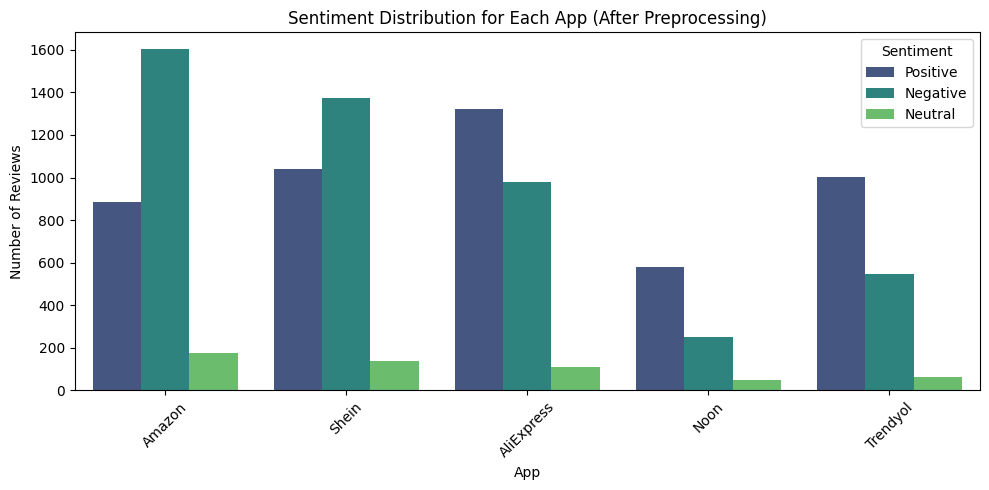

In [18]:
df_after = df.copy()

plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_after,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App (After Preprocessing)")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [19]:

print("\nAfter:\n", df_after["sentiment_label"].value_counts() )


After:
 sentiment_label
Positive    4833
Negative    4749
Neutral      532
Name: count, dtype: int64


In [20]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [21]:
from google.colab import files
files.download("google_play_app_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['final_text'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ''.join(x))
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['final_text'])
print(type(X))
y = df['sentiment_label']


<class 'scipy.sparse._csr.csr_matrix'>


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [29]:
dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

Accuracy: 0.46959960454770144

Classification Report: 

              precision    recall  f1-score   support

    Negative       0.47      1.00      0.64       950
     Neutral       0.00      0.00      0.00       106
    Positive       0.00      0.00      0.00       967

    accuracy                           0.47      2023
   macro avg       0.16      0.33      0.21      2023
weighted avg       0.22      0.47      0.30      2023



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
    )

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.472071181413742

Classification Report: 

              precision    recall  f1-score   support

    Negative       0.47      1.00      0.64       950
     Neutral       0.00      0.00      0.00       106
    Positive       1.00      0.01      0.01       967

    accuracy                           0.47      2023
   macro avg       0.49      0.34      0.22      2023
weighted avg       0.70      0.47      0.31      2023



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
